# Decision Tree

<img src="dt.png" />

In [ ]:
- node -> features (decision based on the features)
- brach -> outcome of that decision
- leaf nodes(no further childs) -> final predictions

In [ ]:
entropy -> degree of disorder

     0111
    /    \
   01    11
 /  \
0    1

In [ ]:
- gini index
- information gain

- mean square error -> regression

In [ ]:
- customer churn prediction -> usage pattern, demographics
- medical diagnosis -> 
- credit scoring
- fraud detection 

In [ ]:
when to use decision tree
- tranparency
- data type is mixed
- ranking the features importance


In [1]:
import pandas as pd
import numpy as np

In [25]:
df = pd.read_csv("datasets/salaries.csv")
df.head()

,company,job,degree,salary_more_then_100k
0,google,sales executive,bachelors,0
1,google,sales executive,masters,0
2,google,business manager,bachelors,1
3,google,business manager,masters,1
4,google,computer programmer,bachelors,0


In [26]:
salary_df = df.drop('salary_more_then_100k', axis='columns')

salary_df

,company,job,degree
0,google,sales executive,bachelors
1,google,sales executive,masters
2,google,business manager,bachelors
3,google,business manager,masters
4,google,computer programmer,bachelors
5,google,computer programmer,masters
6,abc pharma,sales executive,masters
7,abc pharma,computer programmer,bachelors
8,abc pharma,business manager,bachelors
9,abc pharma,business manager,masters


In [27]:
target = df['salary_more_then_100k']

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [29]:
# help(le)

In [30]:
salary_df['company_number'] = le.fit_transform(salary_df['company'])
salary_df['job_number'] = le.fit_transform(salary_df['job'])
salary_df['degree_number'] = le.fit_transform(salary_df['degree'])

In [31]:
salary_df

,company,job,degree,company_number,job_number,degree_number
0,google,sales executive,bachelors,2,2,0
1,google,sales executive,masters,2,2,1
2,google,business manager,bachelors,2,0,0
3,google,business manager,masters,2,0,1
4,google,computer programmer,bachelors,2,1,0
5,google,computer programmer,masters,2,1,1
6,abc pharma,sales executive,masters,0,2,1
7,abc pharma,computer programmer,bachelors,0,1,0
8,abc pharma,business manager,bachelors,0,0,0
9,abc pharma,business manager,masters,0,0,1


In [32]:
salary_df = salary_df.drop(['company', 'job', 'degree'], axis='columns')

salary_df

,company_number,job_number,degree_number
0,2,2,0
1,2,2,1
2,2,0,0
3,2,0,1
4,2,1,0
5,2,1,1
6,0,2,1
7,0,1,0
8,0,0,0
9,0,0,1


In [33]:
target

0     0
1     0
2     1
3     1
4     0
5     1
6     0
7     0
8     0
9     1
10    1
11    1
12    1
13    1
14    1
15    1
Name: salary_more_then_100k, dtype: int64

In [34]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()

model.fit(salary_df, target)

DecisionTreeClassifier()

In [35]:
model.score(salary_df, target)

1.0

In [36]:
model.predict([[2,1,0]])

C:\Users\himan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [37]:
model.predict([[2,1,1]])

C:\Users\himan\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1], dtype=int64)

In [39]:
le.fit_transform(target)

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [40]:
le.inverse_transform([1])

array([1], dtype=int64)

# Preprocessing

In [16]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

le.fit([1,2,2,6])

LabelEncoder()

In [17]:
le.classes_

array([1, 2, 6])

In [18]:
le.transform([1,1,2,6])

array([0, 0, 1, 2], dtype=int64)

In [19]:
le.inverse_transform([2])

array([6])

In [20]:
le.fit(['paris', 'paris', 'goa', 'mumbai'])

LabelEncoder()

In [21]:
le.transform(['goa', 'goa', 'paris'])

array([0, 0, 2])

In [22]:
le.inverse_transform([0,2])

array(['goa', 'paris'], dtype='<U6')

# Income Prediction

In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
df = pd.read_csv('datasets/adult_dataset.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [44]:
df1 = df[df.workclass == '?']
df1

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
14,51,?,172175,Doctorate,16,Never-married,?,Not-in-family,White,Male,0,2824,40,United-States,>50K
24,61,?,135285,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2603,32,United-States,<=50K
44,71,?,100820,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,2489,15,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32533,35,?,320084,Bachelors,13,Married-civ-spouse,?,Wife,White,Female,0,0,55,United-States,>50K
32534,30,?,33811,Bachelors,13,Never-married,?,Not-in-family,Asian-Pac-Islander,Female,0,0,99,United-States,<=50K
32541,71,?,287372,Doctorate,16,Married-civ-spouse,?,Husband,White,Male,0,0,10,United-States,>50K
32543,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K


In [45]:
df = df[df.workclass != '?']
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [46]:
df_categorical = df.select_dtypes(include=['object'])

df_categorical.apply(lambda x: x == '?', axis=0).sum()

workclass           0
education           0
marital.status      0
occupation          7
relationship        0
race                0
sex                 0
native.country    556
income              0
dtype: int64

In [47]:
df = df[df.occupation != '?']
df = df[df['native.country'] != '?']

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 1 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education.num   30162 non-null  int64 
 5   marital.status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital.gain    30162 non-null  int64 
 11  capital.loss    30162 non-null  int64 
 12  hours.per.week  30162 non-null  int64 
 13  native.country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [48]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


# label encoding

In [49]:
df_categorical = df.select_dtypes(include=['object'])

df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,Private,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,United-States,<=50K
3,Private,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,United-States,<=50K
4,Private,Some-college,Separated,Prof-specialty,Own-child,White,Female,United-States,<=50K
5,Private,HS-grad,Divorced,Other-service,Unmarried,White,Female,United-States,<=50K
6,Private,10th,Separated,Adm-clerical,Unmarried,White,Male,United-States,<=50K


In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df_categorical = df_categorical.apply(le.fit_transform)

df_categorical.head()

,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,2,11,6,3,1,4,0,38,0
3,2,5,0,6,4,4,0,38,0
4,2,15,5,9,3,4,0,38,0
5,2,11,0,7,4,4,0,38,0
6,2,0,5,0,4,4,1,38,0


In [51]:
df = df.drop(df_categorical.columns, axis=1)

df = pd.concat([df, df_categorical], axis=1)

df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [52]:
df['income'] = df['income'].astype('category')

df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,workclass,education,marital.status,occupation,relationship,race,sex,native.country,income
1,82,132870,9,0,4356,18,2,11,6,3,1,4,0,38,0
3,54,140359,4,0,3900,40,2,5,0,6,4,4,0,38,0
4,41,264663,10,0,3900,40,2,15,5,9,3,4,0,38,0
5,34,216864,9,0,3770,45,2,11,0,7,4,4,0,38,0
6,38,150601,6,0,3770,40,2,0,5,0,4,4,1,38,0


In [53]:
from sklearn.model_selection import train_test_split

x = df.drop('income', axis=1)

y = df['income']

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3, random_state=45)

In [54]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5)

model.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=5)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix

ypred = model.predict(xtest)

print(classification_report(ytest, ypred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.91      6790
           1       0.79      0.55      0.65      2259

    accuracy                           0.85      9049
   macro avg       0.83      0.75      0.78      9049
weighted avg       0.85      0.85      0.84      9049



In [56]:
print(confusion_matrix(ytest, ypred))

[[6463  327]
 [1012 1247]]


# Hyperparameter Tuning

In [67]:
# help(DecisionTreeClassifier)

In [59]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

nfolds = 5

parameters = {'max_depth': range(1,40)}

dtree = DecisionTreeClassifier(criterion='gini', random_state=110)

gs = GridSearchCV(dtree, parameters, cv=nfolds, scoring='accuracy')

gs.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=110),
             param_grid={'max_depth': range(1, 40)}, scoring='accuracy')

In [60]:
scores = gs.cv_results_

scores = pd.DataFrame(scores)

scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012226,0.001260,0.002571,0.001013,1,{'max_depth': 1},0.751362,0.751362,0.751362,0.751540,0.751303,0.751385,0.000080,39
1,0.017122,0.002409,0.002302,0.000274,2,{'max_depth': 2},0.813876,0.820744,0.815534,0.823306,0.831596,0.821011,0.006297,17
2,0.021240,0.002172,0.002692,0.000844,3,{'max_depth': 3},0.829031,0.835425,0.828558,0.836333,0.847703,0.835410,0.006922,12
3,0.024524,0.000674,0.002701,0.000932,4,{'max_depth': 4},0.835899,0.843239,0.832110,0.846281,0.854808,0.842467,0.007973,10
4,0.029765,0.001680,0.002552,0.001031,5,{'max_depth': 5},0.841108,0.844660,0.835662,0.850545,0.857650,0.845925,0.007602,4
5,0.033302,0.001474,0.002490,0.000590,6,{'max_depth': 6},0.842292,0.849159,0.842292,0.850782,0.860019,0.848909,0.006551,2
6,0.039964,0.001000,0.002504,0.000493,7,{'max_depth': 7},0.840398,0.853422,0.845371,0.852440,0.858835,0.850093,0.006470,1
7,0.053871,0.006701,0.003913,0.001602,8,{'max_depth': 8},0.843003,0.850107,0.843713,0.849597,0.858124,0.848909,0.005454,3
8,0.051684,0.003529,0.001991,0.000035,9,{'max_depth': 9},0.840398,0.844897,0.838030,0.849597,0.852203,0.845025,0.005344,6
9,0.053296,0.004719,0.002918,0.000595,10,{'max_depth': 10},0.843003,0.848449,0.840161,0.842965,0.851255,0.845167,0.004060,5


In [61]:
scores.columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_max_depth', 'params', 'split0_test_score', 'split1_test_score',
       'split2_test_score', 'split3_test_score', 'split4_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

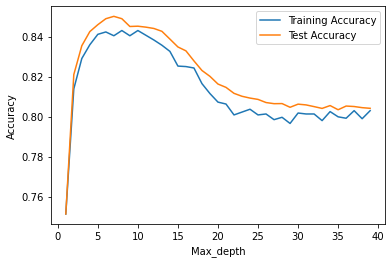

In [62]:
plt.plot(scores['param_max_depth'], scores['split0_test_score'], label='Training Accuracy')
plt.plot(scores['param_max_depth'], scores['mean_test_score'], label='Test Accuracy')

plt.xlabel('Max_depth')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [63]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

nfolds = 5

parameters = {'min_samples_leaf': range(5,200,20)}

dtree = DecisionTreeClassifier(criterion='gini', random_state=110)

gs = GridSearchCV(dtree, parameters, cv=nfolds, scoring='accuracy')

gs.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=110),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             scoring='accuracy')

In [64]:
scores = gs.cv_results_

scores = pd.DataFrame(scores)

scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.070440,0.006196,0.002218,0.000392,5,{'min_samples_leaf': 5},0.820270,0.830452,0.827611,0.825675,0.830175,0.826837,0.003723,10
1,0.057306,0.002598,0.002511,0.000725,25,{'min_samples_leaf': 25},0.844423,0.850817,0.848212,0.850545,0.852440,0.849287,0.002781,4
2,0.052798,0.001904,0.002223,0.000389,45,{'min_samples_leaf': 45},0.841345,0.856263,0.849633,0.850071,0.865230,0.852508,0.007934,1
3,0.059458,0.005609,0.002415,0.000571,65,{'min_samples_leaf': 65},0.843239,0.852238,0.846318,0.853150,0.862151,0.851419,0.006508,3
4,0.051774,0.001999,0.002437,0.000580,85,{'min_samples_leaf': 85},0.844897,0.852711,0.845607,0.851018,0.864045,0.851656,0.006889,2
5,0.049473,0.003704,0.002117,0.000466,105,{'min_samples_leaf': 105},0.843950,0.847265,0.842055,0.848176,0.858598,0.848009,0.005738,5
6,0.053748,0.003454,0.002494,0.000306,125,{'min_samples_leaf': 125},0.843476,0.848212,0.841345,0.848650,0.854334,0.847204,0.004520,6
7,0.053812,0.002598,0.002205,0.000399,145,{'min_samples_leaf': 145},0.842766,0.844423,0.840398,0.845334,0.854808,0.845546,0.004926,7
8,0.055783,0.004823,0.002693,0.000581,165,{'min_samples_leaf': 165},0.838267,0.844423,0.837556,0.843913,0.856229,0.844078,0.006695,8
9,0.070334,0.006844,0.003594,0.001074,185,{'min_samples_leaf': 185},0.836135,0.843713,0.838030,0.841781,0.854334,0.842799,0.006357,9


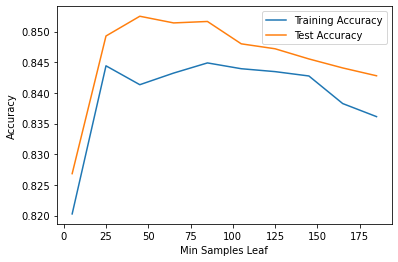

In [65]:
plt.plot(scores['param_min_samples_leaf'], scores['split0_test_score'], label='Training Accuracy')
plt.plot(scores['param_min_samples_leaf'], scores['mean_test_score'], label='Test Accuracy')

plt.xlabel('Min Samples Leaf')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [68]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

nfolds = 5

parameters = {'min_samples_split': range(5,200,20)}

dtree = DecisionTreeClassifier(criterion='gini', random_state=110)

gs = GridSearchCV(dtree, parameters, cv=nfolds, scoring='accuracy')

gs.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=110),
             param_grid={'min_samples_split': range(5, 200, 20)},
             scoring='accuracy')

In [69]:
scores = gs.cv_results_

scores = pd.DataFrame(scores)

scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.077699,0.007167,0.002810,0.000401,5,{'min_samples_split': 5},0.811272,0.807956,0.811272,0.814780,0.819280,0.812912,0.003847,10
1,0.070765,0.001409,0.002425,0.000582,25,{'min_samples_split': 25},0.824769,0.828321,0.830452,0.836097,0.833728,0.830673,0.003980,9
2,0.075268,0.014361,0.002937,0.001548,45,{'min_samples_split': 45},0.831163,0.844187,0.840871,0.842255,0.840834,0.839862,0.004518,8
3,0.080127,0.005136,0.003105,0.000209,65,{'min_samples_split': 65},0.835899,0.848449,0.843713,0.847229,0.845808,0.844219,0.004449,7
4,0.068025,0.002018,0.002500,0.000645,85,{'min_samples_split': 85},0.843950,0.851527,0.845134,0.848413,0.851018,0.848008,0.003044,6
5,0.068998,0.004077,0.002494,0.000635,105,{'min_samples_split': 105},0.847502,0.857211,0.847028,0.852676,0.855519,0.851987,0.004122,5
6,0.133397,0.043258,0.006824,0.003930,125,{'min_samples_split': 125},0.845371,0.858158,0.849396,0.851255,0.862151,0.853266,0.006070,1
7,0.117359,0.005262,0.004712,0.001539,145,{'min_samples_split': 145},0.843713,0.855553,0.850343,0.850308,0.861914,0.852366,0.006075,3
8,0.095861,0.013017,0.003765,0.000634,165,{'min_samples_split': 165},0.845607,0.855790,0.850107,0.850545,0.862151,0.852840,0.005665,2
9,0.084150,0.002794,0.003861,0.001428,185,{'min_samples_split': 185},0.845134,0.856027,0.850343,0.848176,0.861203,0.852177,0.005749,4


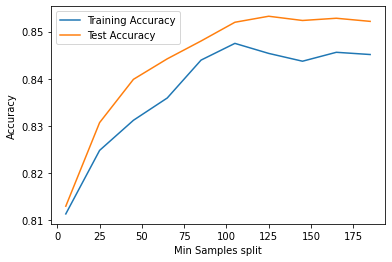

In [70]:
plt.plot(scores['param_min_samples_split'], scores['split0_test_score'], label='Training Accuracy')
plt.plot(scores['param_min_samples_split'], scores['mean_test_score'], label='Test Accuracy')

plt.xlabel('Min Samples split')
plt.ylabel('Accuracy')

plt.legend()
plt.show()

In [71]:
param_grid = {
    'max_depth': range(5,15,5),
    'min_samples_leaf': range(50,150,50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ['entropy', 'gini']
}

nfolds = 5

dtree = DecisionTreeClassifier()

gs = GridSearchCV(dtree, param_grid=param_grid, cv=nfolds, scoring='accuracy')

gs.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='accuracy')

In [72]:
scores = gs.cv_results_

scores = pd.DataFrame(scores)

scores

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.033160,0.002836,0.002029,0.000632,entropy,5,50,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834715,0.844423,0.836135,0.843676,0.851729,0.842136,0.006176,13
1,0.032195,0.001091,0.002253,0.000311,entropy,5,50,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.834715,0.844423,0.836135,0.843676,0.851729,0.842136,0.006176,13
2,0.037119,0.001223,0.002508,0.000551,entropy,5,100,50,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.833531,0.843713,0.833767,0.838465,0.850308,0.839957,0.006373,15
3,0.036722,0.002776,0.002510,0.000851,entropy,5,100,100,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.833531,0.843713,0.833767,0.838465,0.850308,0.839957,0.006373,15
4,0.064143,0.012343,0.003305,0.001634,entropy,10,50,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.843239,0.850580,0.844187,0.843676,0.852440,0.846824,0.003882,3
5,0.084097,0.007282,0.003300,0.000389,entropy,10,50,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.843239,0.850580,0.844187,0.843676,0.852440,0.846824,0.003882,3
6,0.077638,0.002680,0.003033,0.000295,entropy,10,100,50,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.843476,0.850343,0.839214,0.845334,0.854571,0.846588,0.005357,5
7,0.067859,0.002782,0.002807,0.000406,entropy,10,100,100,"{'criterion': 'entropy', 'max_depth': 10, 'min...",0.843476,0.850343,0.839214,0.845334,0.854571,0.846588,0.005357,5
8,0.037209,0.001536,0.002441,0.000496,gini,5,50,50,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.839687,0.844423,0.836135,0.849360,0.857650,0.845451,0.007552,9
9,0.034631,0.002384,0.002563,0.000489,gini,5,50,100,"{'criterion': 'gini', 'max_depth': 5, 'min_sam...",0.839687,0.844423,0.836135,0.849360,0.857650,0.845451,0.007552,9


In [73]:
gs.best_score_

0.8481033181738182

In [74]:
gs.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)

In [75]:
dt = DecisionTreeClassifier(criterion='gini',
                           random_state=102,
                           max_depth=10,
                           min_samples_leaf=50,
                           min_samples_split=50)

dt.fit(xtrain, ytrain)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=102)

In [76]:
dt.score(xtest, ytest)

0.8530224334180573

# help(GridSearchCV)

‘accuracy’ ----- > metrics.accuracy_score

https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter